# Regresión

### Importación de bibliotecas requeridas

In [1]:
# Cargar bibliotecas
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Diabetes dataset

In [2]:
# Base de datos de diabetes de la India Pima
# Predecir la aparición de diabetes con base en medidas de diagnóstico
# https://www.kaggle.com/uciml/pima-indians-diabetes-database (descárguelo)

# Cargar conjunto de datos
pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_2 = pima[pima['Outcome']==1.0];
df_2 = df_2.iloc[:, 0:-1]

In [6]:
import statsmodels.api as sm

## Construya un modelo de regresión lineal simple donde el nivel de insulina se explique por el nivel de glucosa del paciente.

independent = 'Glucose'
feature_cols = [independent]
X = df_2[feature_cols] # Características (variables independientes)
y = df_2.Insulin # Variable objetivo

## Añade intercepto/constante
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     19.50
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           1.46e-05
Time:                        11:32:47   Log-Likelihood:                -1692.1
No. Observations:                 268   AIC:                             3388.
Df Residuals:                     266   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.9798     37.214     -1.612      0.108    -133.251      13.292
Glucose        1.1349      0.257      4.416      0.000       0.629       1.641
==============================================================================
Omnibus:                       92.767   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.373
Skew:                           1.578   Prob(JB):                     5.80e-56
Kurtosis:                       6.581   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Cleaning data

In [7]:
# Replace zeros with NaN in relevant columns
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
pima[cols_with_missing] = pima[cols_with_missing].replace(0, np.nan)

# Drop rows with any missing values
pima_clean = pima.dropna()

# Update df_2 to use the cleaned data for Outcome == 1
df_2 = pima_clean[pima_clean['Outcome'] == 1.0].iloc[:, 0:-1]

# Show info of cleaned data
pima_clean.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 4 to 755
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               130 n

### Gráficos de residuos

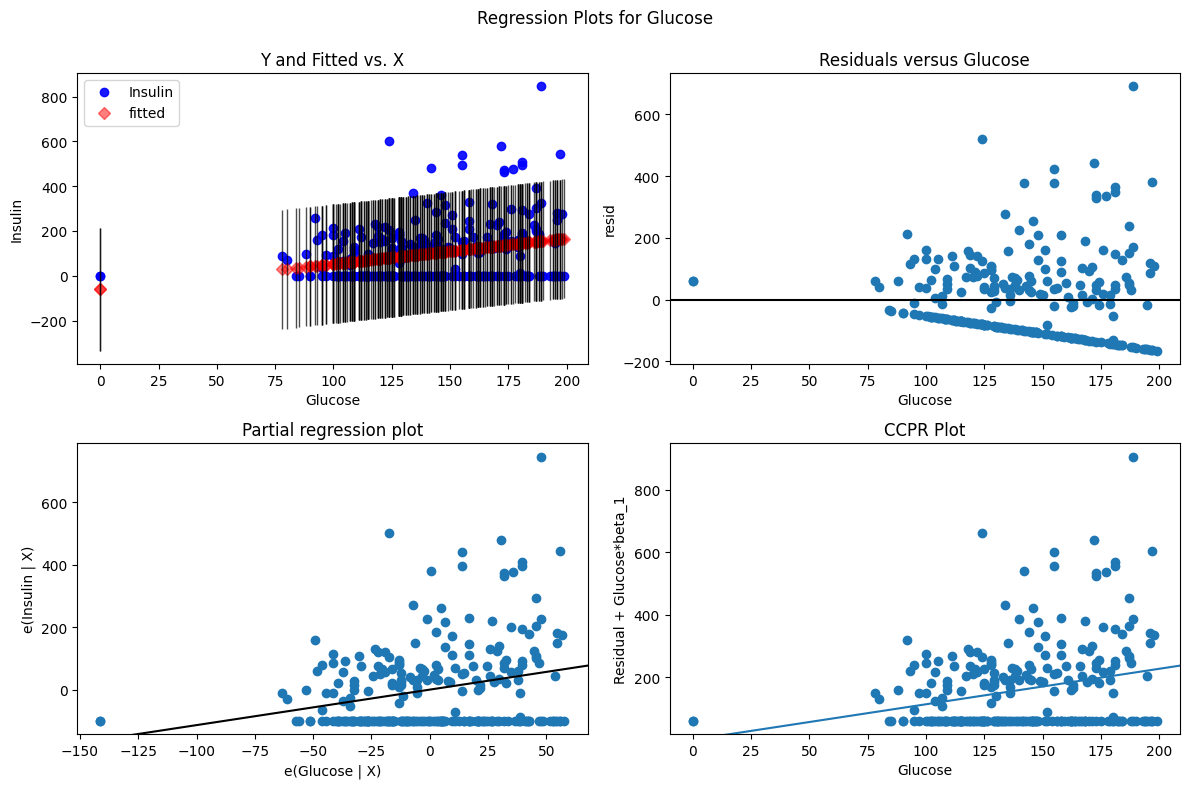

In [8]:
## Grafica los residuos del modelo
## https://www.statsmodels.org/v0.10.2/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
## https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html

# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

#### Responda las siguientes preguntas:
- ¿El modelo muestra homocedasticidad?

Que un modelo muestre homocedasticidad significa que la varianza de los errores es constante a lo largo de todas las predicciones. En nuestro caso los residuos parecen aumentar a medida que el valor de la predicción aumenta, lo que indica que los datos no muestran homocedasticidad.

### Práctica 2: Modelos de regresión simple
- Entrene otros cuatro modelos de regresión simple (IMC, Edad, Grosor de la piel, Función Pedigrí de la Diabetes)
- Dibuje los residuos de cada modelo
- Elija el mejor modelo


In [9]:
## Entrene el modelo usando el IMC para predecir la insulina.

independent_bmi = 'BMI'
feature_cols_bmi = [independent_bmi]
X_bmi = df_2[feature_cols_bmi]
y_bmi = df_2.Insulin

X_bmi = sm.add_constant(X_bmi)
model_bmi = sm.OLS(y_bmi, X_bmi).fit()
model_bmi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.04908
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.825
Time:                        11:32:49   Log-Likelihood:                -819.39
No. Observations:                 130   AIC:                             1643.
Df Residuals:                     128   BIC:                             1649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        220.6477     63.384      3.481      0.001      95.231     346.064
BMI           -0.3858      1.741     -0.222      0.825      -3.831       3.060
==============================================================================
Omnibus:                       60.813   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.487
Skew:                           1.854   Prob(JB):                     3.51e-38
Kurtosis:                       7.253   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

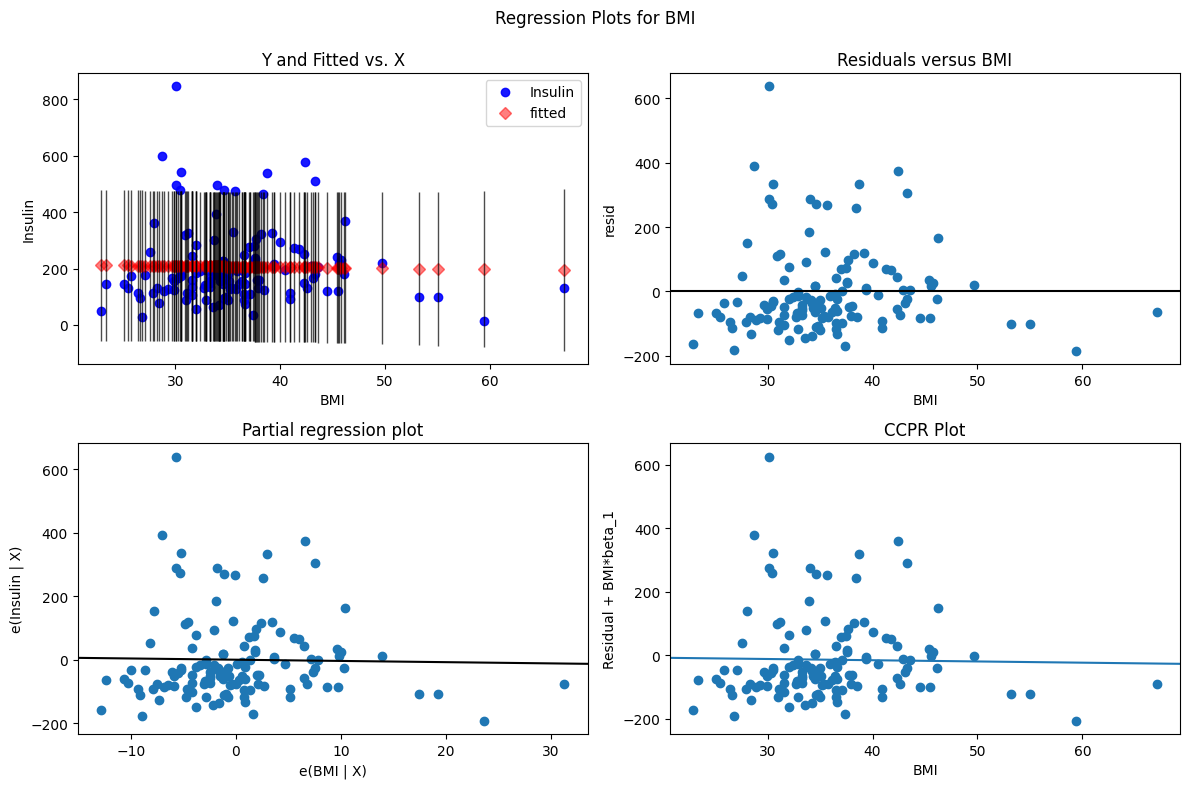

In [29]:
## Dibuje los residuos del modelo que usa el IMC para predecir la insulina.
# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model_bmi, independent_bmi, fig=fig)

In [30]:
## Entrene el modelo usando la Edad para predecir la insulina.
independent_age = 'Age'
feature_cols_age = [independent_age]
x_age = df_2[feature_cols_age]
y_age = df_2.Insulin
x_age = sm.add_constant(x_age)
model_age = sm.OLS(y_age, x_age).fit()
model_age.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.519
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0118
Time:                        11:47:58   Log-Likelihood:                -816.18
No. Observations:                 130   AIC:                             1636.
Df Residuals:                     128   BIC:                             1642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.1272     40.309      2.682      0.008      28.368     187.886
Age            2.7469      1.076      2.553      0.012       0.618       4.876
==============================================================================
Omnibus:                       55.816   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.527
Skew:                           1.784   Prob(JB):                     6.13e-30
Kurtosis:                       6.479   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

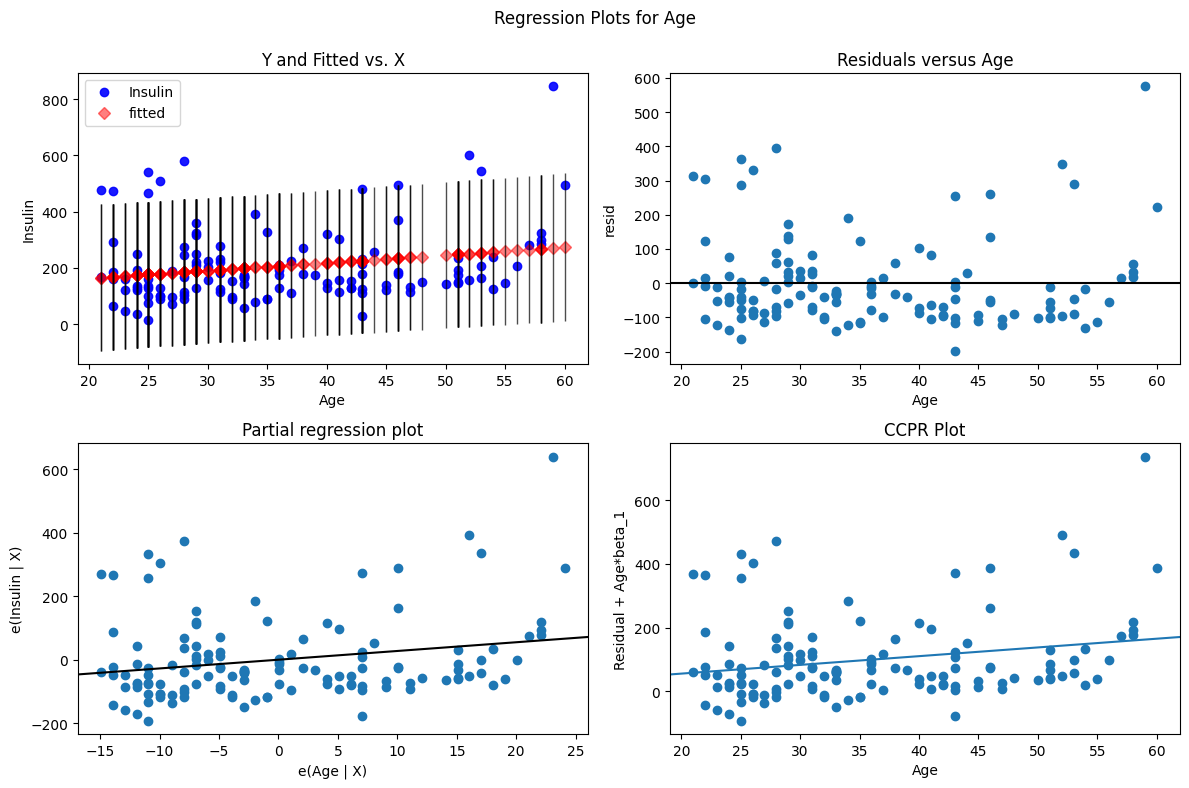

In [31]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_age, independent_age, fig=fig)


In [32]:
## Entrene el modelo usando el Grosor de la piel para predecir la insulina.
independent_skin = 'SkinThickness'
feature_cols_skin = [independent_skin]
x_skin = df_2[feature_cols_skin]
y_skin = df_2.Insulin
x_skin = sm.add_constant(x_skin)
model_skin = sm.OLS(y_skin, x_skin).fit()
model_skin.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3450
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.558
Time:                        11:58:29   Log-Likelihood:                -819.24
No. Observations:                 130   AIC:                             1642.
Df Residuals:                     128   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           183.3283     41.705      4.396      0.000     100.808     265.848
SkinThickness     0.7135      1.215      0.587      0.558      -1.690       3.117
==============================================================================
Omnibus:                       62.445   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.671
Skew:                           1.880   Prob(JB):                     2.92e-41
Kurtosis:                       7.509   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

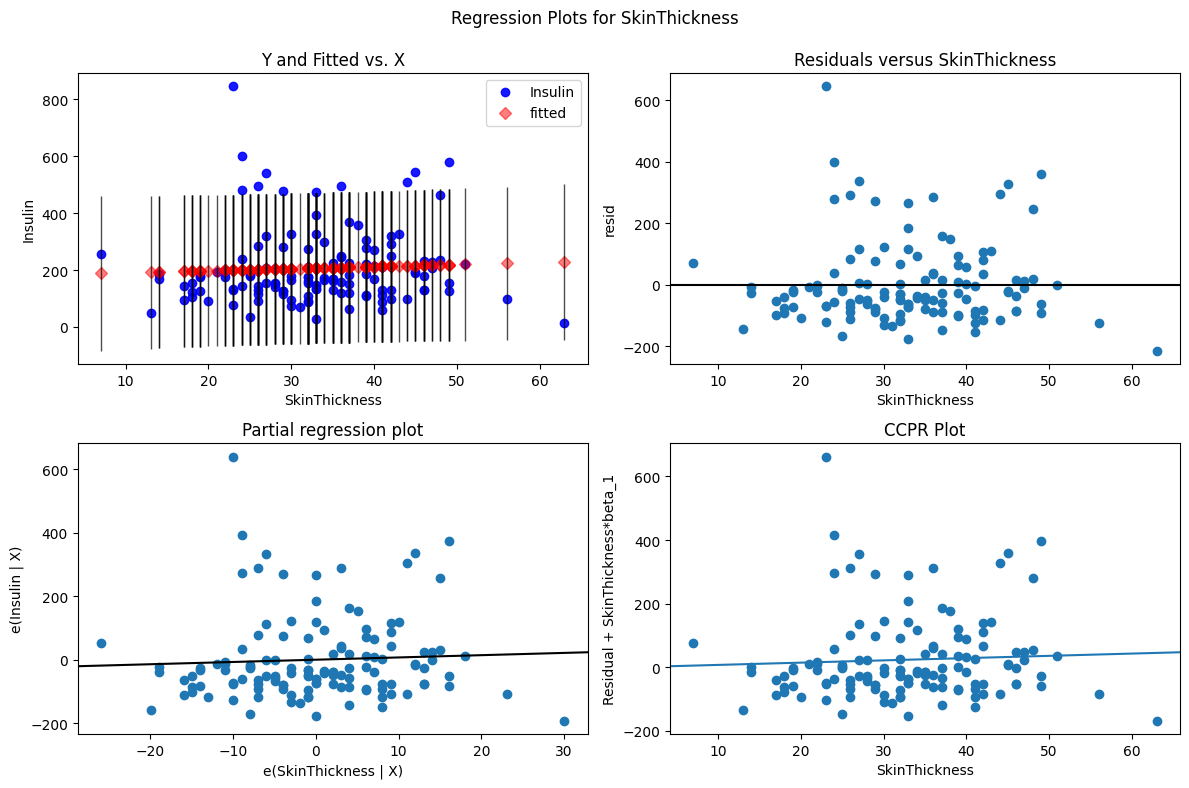

In [33]:
## Dibuje los residuos del modelo que usa el Grosor de la piel para predecir la insulina.
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_skin, independent_skin, fig=fig)

In [34]:
## Entrene el modelo usando DiabetesPedigreeFunction para predecir la insulina.
independent_pedigree = 'DiabetesPedigreeFunction'
feature_cols_pedigree = [independent_pedigree]
x_pedigree = df_2[feature_cols_pedigree]
y_pedigree = df_2.Insulin
x_pedigree = sm.add_constant(x_pedigree)
model_pedigree = sm.OLS(y_pedigree, x_pedigree).fit()
model_pedigree.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.023
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.314
Time:                        12:37:00   Log-Likelihood:                -818.89
No. Observations:                 130   AIC:                             1642.
Df Residuals:                     128   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      225.0541     21.439     10.498      0.000     182.634     267.474
DiabetesPedigreeFunction   -29.1054     28.781     -1.011      0.314     -86.054      27.843
==============================================================================
Omnibus:                       60.624   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.469
Skew:                           1.853   Prob(JB):                     9.62e-38
Kurtosis:                       7.211   Cond. No.                         3.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

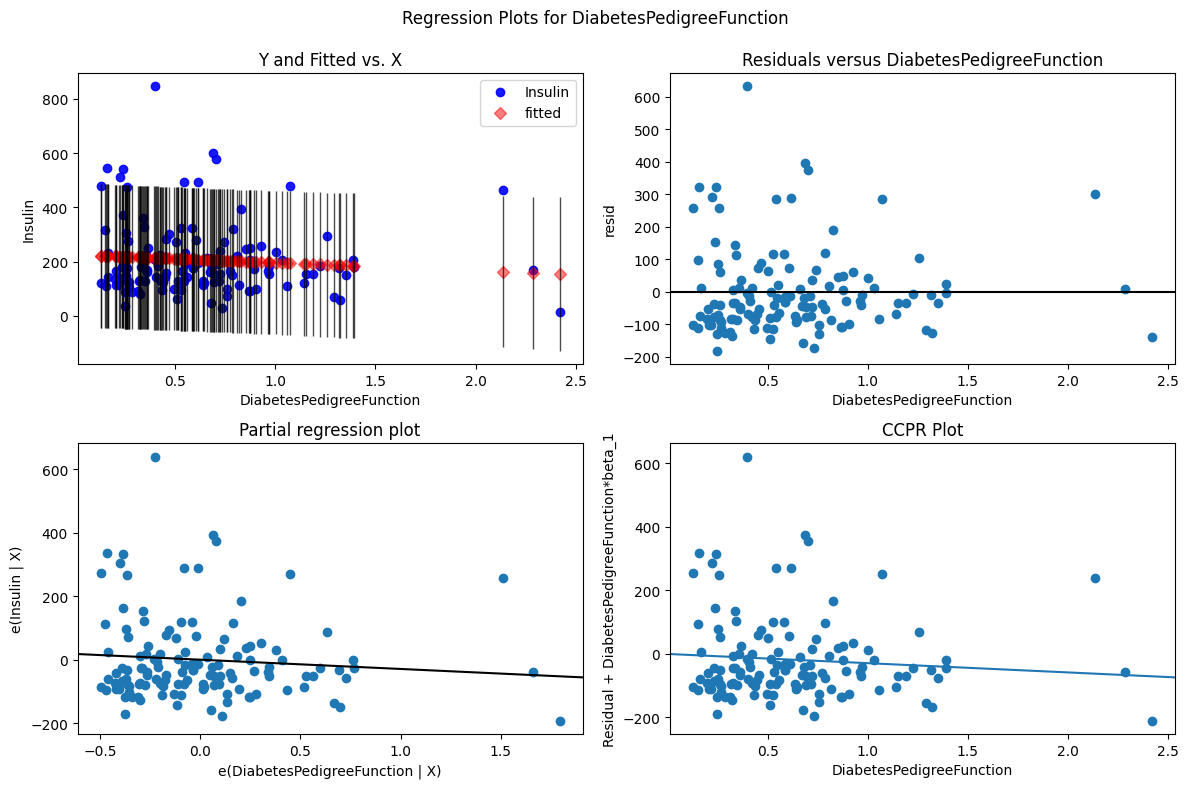

In [35]:
## Dibuje los residuos del modelo que usa DiabetesPedigreeFunction para predecir la insulina.

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_pedigree, independent_pedigree, fig=fig)

#### El mejor modelo es el que usa age para predecir la insulina. Su R² es 0.048 y todos sus coeficientes son significativos.

## Regresión lineal múltiple



In [17]:
## Construya un modelo de regresión lineal múltiple con todas las variables.
feature_cols = [ 'Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']

df_3 = df_2

X = df_3[feature_cols] # Características (variables independientes)
y = df_3.Insulin # Variable objetivo

In [18]:
import statsmodels.api as sm
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     5.467
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           1.76e-05
Time:                        11:32:49   Log-Likelihood:                -801.68
No. Observations:                 130   AIC:                             1619.
Df Residuals:                     122   BIC:                             1642.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -23.9067     93.491     -0.256      0.799    -208.982     161.169
Glucose                      1.5658      0.362      4.323      0.000       0.849       2.283
BMI                          0.0043      2.004      0.002      0.998      -3.964       3.972
Age                          3.8893      1.312      2.964      0.004       1.291       6.487
DiabetesPedigreeFunction   -35.6414     26.569     -1.341      0.182     -88.237      16.954
SkinThickness                1.5896      1.372      1.159      0.249      -1.126       4.305
Pregnancies                 -5.5419      3.422     -1.619      0.108     -12.317       1.233
BloodPressure               -1.9149      0.874     -2.191      0.030      -3.645      -0.185
==============================================================================
Omnibus:                       41.140   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.091
Skew:                           1.414   Prob(JB):                     1.82e-17
Kurtosis:                       5.496   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Responda las siguientes preguntas:
- ¿Son significativos todos los coeficientes?
- ¿Existe evidencia de multicolinealidad?

### Eliminación la multicolinealidad

In [19]:
## Reordena las columnas estableciendo "Insulina" como última columna
df_3 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure','Insulin']]


In [20]:
## Identifica la colinealidad de cada predictor mediante VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

## Imprimir el coeficiente VIF del dataframe, excepto el de la última columna.
## Un VIF > 10 indica alta multicolinealidad
def printVIF(df):
    for i in range(len(df.columns[:-1])):
        v = vif(np.matrix(df[:-1]),i)
        print("VIF for {}: {}".format(df.columns[i],round(v,2)))


In [21]:
printVIF(df_3)

VIF for Glucose: 24.72
VIF for BMI: 39.37
VIF for Age: 22.59
VIF for DiabetesPedigreeFunction: 3.55
VIF for SkinThickness: 20.43
VIF for Pregnancies: 3.92
VIF for BloodPressure: 35.22


#### Responda las siguientes preguntas:
- ¿Qué variables tienen un VIF superior a 10?
- ¿Qué variables con un valor p alto deberían eliminarse?
- ¿Qué variables recomendaría VIF eliminar?

In [22]:
# Elimina la presión arterial
df_4 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for Glucose: 21.99
VIF for BMI: 32.18
VIF for Age: 19.42
VIF for DiabetesPedigreeFunction: 3.51
VIF for SkinThickness: 20.3
VIF for Pregnancies: 3.92


In [23]:
# Elimina la glucosa
df_4 = df_3[['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for BMI: 28.08
VIF for Age: 16.38
VIF for DiabetesPedigreeFunction: 3.5
VIF for SkinThickness: 20.21
VIF for Pregnancies: 3.89


#### Responda las siguientes preguntas:
- ¿Por qué cambian todos los coeficientes VIF al eliminar una característica?
- ¿Podríamos entrenar un modelo sin multicolinealidad con estas 5 variables?

In [24]:
feature_cols = ['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.658
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0256
Time:                        11:32:49   Log-Likelihood:                -812.79
No. Observations:                 130   AIC:                             1638.
Df Residuals:                     124   BIC:                             1655.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       83.7358     79.680      1.051      0.295     -73.973     241.445
BMI                         -1.2436      2.125     -0.585      0.559      -5.449       2.962
Age                          4.4733      1.345      3.327      0.001       1.812       7.135
DiabetesPedigreeFunction   -32.4786     28.498     -1.140      0.257     -88.885      23.928
SkinThickness                1.8724      1.473      1.271      0.206      -1.043       4.787
Pregnancies                 -7.7332      3.663     -2.111      0.037     -14.983      -0.483
==============================================================================
Omnibus:                       47.523   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.079
Skew:                           1.613   Prob(JB):                     2.26e-21
Kurtosis:                       5.674   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Responda las siguientes preguntas:
- ¿Sigue existiendo multicolinealidad?
- ¿Son significativos todos los coeficientes?
- ¿Es significativa la intersección con el eje X?
- ¿Qué variable deberíamos eliminar a continuación?

In [25]:
## Eliminar DiabetesPedigreeFunction
feature_cols = ['BMI', 'Age','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.991
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0213
Time:                        11:32:49   Log-Likelihood:                -813.47
No. Observations:                 130   AIC:                             1637.
Df Residuals:                     125   BIC:                             1651.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            74.2614     79.340      0.936      0.351     -82.762     231.285
BMI              -1.3771      2.124     -0.648      0.518      -5.581       2.826
Age               4.4747      1.346      3.324      0.001       1.810       7.139
SkinThickness     1.6704      1.464      1.141      0.256      -1.227       4.567
Pregnancies      -7.6121      3.666     -2.076      0.040     -14.867      -0.357
==============================================================================
Omnibus:                       46.943   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.540
Skew:                           1.593   Prob(JB):                     4.87e-21
Kurtosis:                       5.669   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
## Eliminar embarazos
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.486
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0637
Time:                        11:32:49   Log-Likelihood:                -815.67
No. Observations:                 130   AIC:                             1639.
Df Residuals:                     126   BIC:                             1651.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            87.6345     80.110      1.094      0.276     -70.902     246.171
BMI              -0.8153      2.134     -0.382      0.703      -5.039       3.408
SkinThickness     1.4320      1.478      0.969      0.335      -1.494       4.358
Age               2.8154      1.098      2.565      0.011       0.643       4.988
==============================================================================
Omnibus:                       56.547   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.603
Skew:                           1.783   Prob(JB):                     1.78e-31
Kurtosis:                       6.665   Cond. No.                         429.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
## Eliminar el intercepto
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              110.8
Date:                Sat, 26 Apr 2025   Prob (F-statistic):                    2.65e-35
Time:                        11:32:49   Log-Likelihood:                         -816.29
No. Observations:                 130   AIC:                                      1639.
Df Residuals:                     127   BIC:                                      1647.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BMI               0.7298      1.601      0.456      0.649      -2.438       3.898
SkinThickness     1.5345      1.477      1.039      0.301      -1.387       4.456
Age               3.5719      0.853      4.187      0.000       1.884       5.260
==============================================================================
Omnibus:                       54.386   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.152
Skew:                           1.734   Prob(JB):                     5.47e-29
Kurtosis:                       6.464   Cond. No.                         11.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
## Eliminar el IMC
feature_cols = ['SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              167.2
Date:                Sat, 26 Apr 2025   Prob (F-statistic):                    2.00e-36
Time:                        11:32:49   Log-Likelihood:                         -816.40
No. Observations:                 130   AIC:                                      1637.
Df Residuals:                     128   BIC:                                      1643.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SkinThickness     2.0974      0.807      2.599      0.010       0.501       3.694
Age               3.7639      0.739      5.090      0.000       2.301       5.227
==============================================================================
Omnibus:                       53.288   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.565
Skew:                           1.704   Prob(JB):                     5.42e-28
Kurtosis:                       6.401   Cond. No.                         4.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer the following questions:
#### Responda las siguientes preguntas:
- ¿Es significativo este modelo?
- ¿Podemos usarlo para predecir el nivel de insulina?
- ¿Cómo es la ecuación del modelo?
- Revise la evolución del error

### Selección de características



#### Haga modelos con Ridge, LASSO y Elastic Net (con validación cruzada).
#### Conteste las siguientes preguntas:
- ¿Cuáles son los 2 mejores modelos?
- ¿Cuál de estos modelos es el mejor (de acuerdo al R2 y la F-statistic)?
- ¿Cuáles parecen ser los coeficientes más relevantes?